In [63]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import font_manager
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
plt.rcParams['font.family'] = 'AppleGothic'

In [64]:
import folium
import time
import seaborn as sns

In [164]:
import datetime
import time

In [65]:
m = folium.Map(
    location= [37.566345, 126.977893],
    tiles = "Stamen Terrain")
m

In [66]:
def gu_filtering(df,station):
    
    # 컬럼명 편집
    df.columns=['자전거번호', '대여일시', 'id', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리']
    T_station = station[['대여소\n번호','소재지(위치)','Unnamed: 4','Unnamed: 5']]
    T_station.columns=['id','소재지(위치)','Unnamed: 4','Unnamed: 5']
    
    # 합집합 merge
    T_station = pd.merge(sb2101,T_station,how='outer',on='id')
    q = T_station['소재지(위치)'].astype(str)
    T_station['소재지(위치)'] = q
    
    #groupby 를 통한 구별 이용량 통계
    total = T_station.groupby(T_station['소재지(위치)']).count()[['자전거번호']]
    total = total.reset_index()
    
    #불필요 데이터 삭제
    total = total.drop(index=[0,23], axis=0)
    
    # 정렬
    total = total.sort_values(by='자전거번호',ascending=False)
    
    plt.figure(figsize=(20, 10))
    plt.title(df['대여일시'][0].split(' ')[0].split('-')[:2],size=30)
    return plt.plot(total['소재지(위치)'],total['자전거번호'])

In [67]:
def gu_count_filtering(df,station):
    
    # 컬럼명 편집
    df.columns=['자전거번호', '대여일시', 'id', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리']
    T_station = station[['대여소\n번호','소재지(위치)','Unnamed: 4','Unnamed: 5']]
    T_station.columns=['id','소재지(위치)','Unnamed: 4','Unnamed: 5']
    
    # 합집합 merge
    T_station = pd.merge(df,T_station,how='outer',on='id')
    q = T_station['소재지(위치)'].astype(str)
    T_station['소재지(위치)'] = q
    
    #groupby 를 통한 구별 이용량 통계
    total = T_station.groupby(T_station['소재지(위치)']).count()[['자전거번호']]
    total = total.reset_index()
    
    #불필요 데이터 삭제
    total = total.drop(index=[0,23], axis=0)
    
    # 정렬
    total = total.sort_values(by='자전거번호',ascending=False)
    
    return total

In [68]:
station = pd.read_csv('./data/location_2021.01.csv',encoding='cp949')

In [69]:
!ls ./data

D_report.txt
O_report.txt
high_report.txt
location_2021.01.csv
서울시 공공자전거 고장신고 내역_2020.11_2021.01.csv
공공자전거 대여이력 정보_2020.06.csv
공공자전거 대여이력 정보_2020.07.csv
공공자전거 대여이력 정보_2020.08.csv
공공자전거 대여이력 정보_2020.09.csv
공공자전거 대여이력 정보_2020.10.csv
공공자전거 대여이력 정보_2020.11.csv
공공자전거 대여이력 정보_2020.12.csv
공공자전거 대여이력 정보_2020.01.csv
공공자전거 대여이력 정보_2020.02.csv
공공자전거 대여이력 정보_2020.03.csv
공공자전거 대여이력 정보_2020.04.csv
공공자전거 대여이력 정보_2020.05.csv
편집된파일


In [257]:
file_list = [
'공공자전거 대여이력 정보_2020.06.csv',
'공공자전거 대여이력 정보_2020.07.csv',
'공공자전거 대여이력 정보_2020.08.csv',
'공공자전거 대여이력 정보_2020.09.csv',
'공공자전거 대여이력 정보_2020.10.csv',
'공공자전거 대여이력 정보_2020.11.csv',
'공공자전거 대여이력 정보_2020.12.csv',
'공공자전거 대여이력 정보_2020.01.csv',
'공공자전거 대여이력 정보_2020.02.csv',
'공공자전거 대여이력 정보_2020.03.csv',
'공공자전거 대여이력 정보_2020.04.csv',
'공공자전거 대여이력 정보_2020.05.csv']
file_list.sort()

totla_files  = []
for i in file_list:
    totla_files.append(pd.read_csv('./data/{}'.format(i)))

In [258]:
file_list.sort()

In [259]:
file_list

['공공자전거 대여이력 정보_2020.01.csv',
 '공공자전거 대여이력 정보_2020.02.csv',
 '공공자전거 대여이력 정보_2020.03.csv',
 '공공자전거 대여이력 정보_2020.04.csv',
 '공공자전거 대여이력 정보_2020.05.csv',
 '공공자전거 대여이력 정보_2020.06.csv',
 '공공자전거 대여이력 정보_2020.07.csv',
 '공공자전거 대여이력 정보_2020.08.csv',
 '공공자전거 대여이력 정보_2020.09.csv',
 '공공자전거 대여이력 정보_2020.10.csv',
 '공공자전거 대여이력 정보_2020.11.csv',
 '공공자전거 대여이력 정보_2020.12.csv']

In [260]:
totla_files  = []
for i in file_list:
    totla_files.append(pd.read_csv('./data/{}'.format(i)))

In [72]:
file_list.sort()
file_list

['공공자전거 대여이력 정보_2020.01.csv',
 '공공자전거 대여이력 정보_2020.02.csv',
 '공공자전거 대여이력 정보_2020.03.csv',
 '공공자전거 대여이력 정보_2020.04.csv',
 '공공자전거 대여이력 정보_2020.05.csv',
 '공공자전거 대여이력 정보_2020.06.csv',
 '공공자전거 대여이력 정보_2020.07.csv',
 '공공자전거 대여이력 정보_2020.08.csv',
 '공공자전거 대여이력 정보_2020.09.csv',
 '공공자전거 대여이력 정보_2020.10.csv',
 '공공자전거 대여이력 정보_2020.11.csv',
 '공공자전거 대여이력 정보_2020.12.csv']

In [73]:
count_list = []
for j in totla_files:
    count_list.append(gu_count_filtering(j,station))

In [96]:
time = []
for i in list(totla_files[0]['대여일시'].str.split(' ')):
    time.append(i[1])


In [134]:
T = []
for j in time:
    T.append(j[:2])

In [135]:
T

['00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',

In [137]:
def add_time(df):
    time = []
    T = []
    for i in list(df['대여일시'].str.split(' ')):
        time.append(i[1])
    for j in time:
        T.append(j[:2])
    
    df['time'] = T
    return df

In [138]:
for o in totla_files:
    add_time(o)

In [139]:
totla_files[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time
0,SPB-33273,2020-06-01 00:03:05,1050,���̿� 3�� ���Ա�,0,2020-06-01 00:05:59,1078,���̻�Ÿ�,0,3,0.00,00
1,SPB-30703,2020-06-01 00:00:46,1132,���̿� 7���ⱸ,0,2020-06-01 00:06:53,1169,��â�� 1�� �ⱸ,0,6,0.00,00
2,SPB-31969,2020-06-01 00:02:43,1306,�Ѽ����Ա���2���ⱸ,0,2020-06-01 00:06:59,388,�������б� ��,0,4,0.00,00
3,SPB-19763,2020-06-01 00:00:16,956,���Ͻ��屳����,8,2020-06-01 00:08:25,939,����û ������,6,7,1340.00,00
4,SPB-32949,2020-06-01 00:04:20,709,����3�� ����ο��� ��,0,2020-06-01 00:08:53,712,�����ʱ��Ա� ��Ÿ�,0,5,0.00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
1755041,SPB-14356,2020-06-30 23:55:00,1160,��õ�ⱳ�� 7���ⱸ��,2,2020-07-01 01:55:02,1160,��õ�ⱳ�� 7���ⱸ��,1,119,18060.00,23
1755042,SPB-14454,2020-06-30 18:55:01,1235,���Ʈ������310�� ��,3,2020-07-01 02:46:48,1221,������Ÿ� �����ڴ���,4,471,870.00,18
1755043,SPB-12680,2020-06-30 13:01:33,1346,����8���̰��� ��,1,2020-07-01 02:50:27,1347,�������̾Ⱦ���Ʈ817�� �� ��,1,15,7230.00,13
1755044,SPB-32402,2020-06-30 16:45:32,1956,���߹̸����Ұ��� ��,0,2020-07-01 08:04:52,1956,���߹̸����Ұ��� ��,0,919,39786.76,16


In [140]:
p = []

In [141]:

for i in totla_files:
    p.append(i.groupby(i['time']).count())

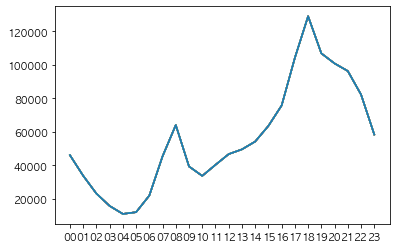

In [145]:
plt.plot(p[1])

In [161]:
p[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
time,,,,,,,,,,,
00,954514,954514,954514,954514,954514,954514,954514,954514,954514,954514,954508
01,738531,738531,738531,738531,738531,738531,738531,738531,738531,738531,738523
02,508111,508111,508111,508111,508111,508111,508111,508111,508111,508111,508105
03,348739,348739,348739,348739,348739,348739,348739,348739,348739,348739,348735
04,236237,236237,236237,236237,236237,236237,236237,236237,236237,236237,236237
05,244426,244426,244426,244426,244426,244426,244426,244426,244426,244426,244422
06,469823,469823,469823,469823,469823,469823,469823,469823,469823,469823,469815
07,1143410,1143410,1143410,1143410,1143410,1143410,1143410,1143410,1143410,1143410,1143404
08,1919857,1919857,1919857,1919857,1919857,1919857,1919857,1919857,1919857,1919857,1919843


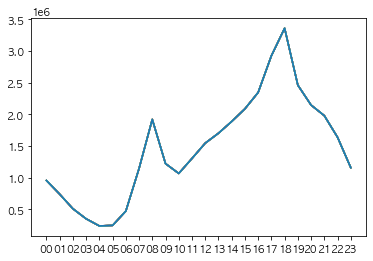

In [147]:
for q in range(1,len(p)):
    p[0] += p[q]
plt.plot(p[0])

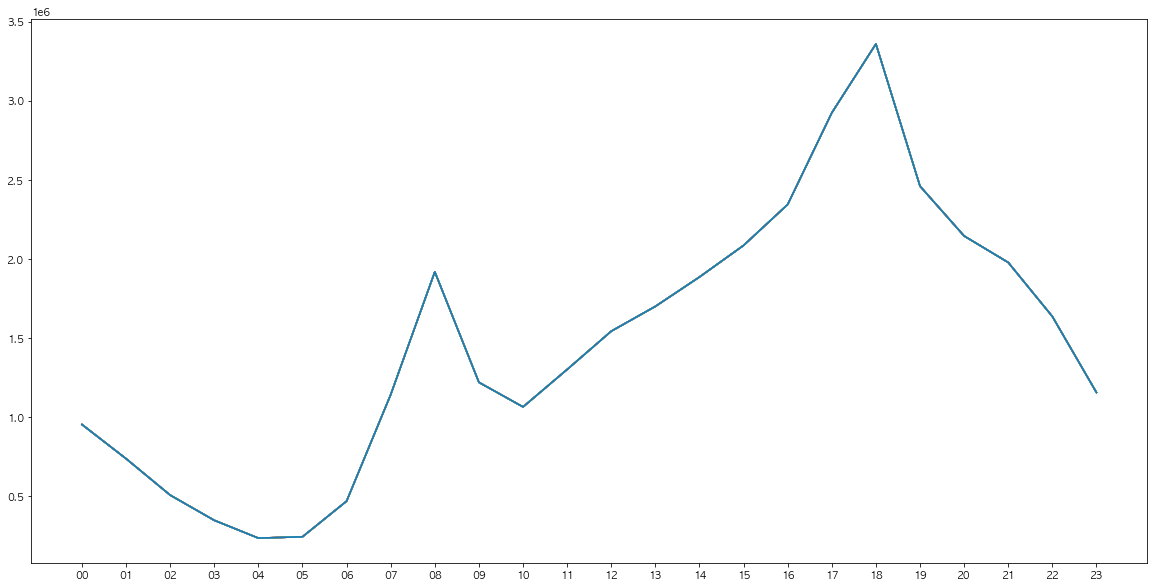

In [148]:
plt.figure(figsize=(20, 10))
plt.plot(p[0])

In [149]:
p[0].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='time')

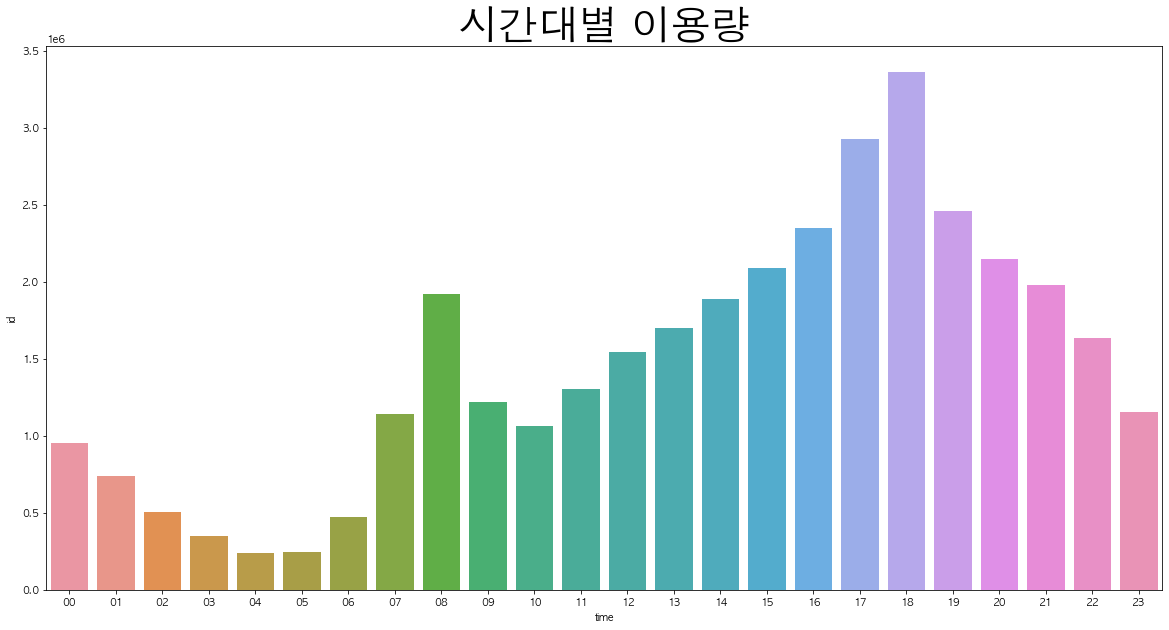

In [160]:
plt.figure(figsize=(20, 10))
sns.barplot(data=p[0], x=p[0].index, y="id")
plt.title('시간대별 이용량', fontsize=40)
plt.show()

In [74]:
a['자전거번호'] = 0
for t in count_list:
    a = pd.merge(a,t,how='outer',on='소재지(위치)')
        

NameError: name 'a' is not defined

In [ ]:
list(a.iloc[[0],1:13])


In [ ]:
for s in range(0,len(a['소재지'])):
    plt.plot(a.loc[[s]]['소재지'])
plt.show()

In [ ]:
ks = a.loc[[0]]
ks = ks.transpose()
ks.index
ks

In [76]:
c = a
c = c.transpose()
list(c[1][1:])

NameError: name 'a' is not defined

In [75]:
plt.figure(figsize=(20,20))
for i in range(0,25):
    plt.plot(list(c[i][1:]))
plt.show()

NameError: name 'c' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
for z in 

In [ ]:
a

In [ ]:
a.loc[0]

In [ ]:
# a.info()
# a.columns=['소재지','x','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
a

In [ ]:
a.columns=['']

In [ ]:

for k in count_list:
    plt.figure(figsize=(20,20))
#     plt.title('2020년 {}월 구별 이용량'.format(count_list.index(k)+1), size=30)
    plt.plot(k['소재지(위치)'],k['자전거번호'])
plt.show()

In [ ]:
a = count_list[0]
a['자전거번호'] = 0
a

In [ ]:
for l in range(len(count_list)):
    a['자전거번호'] += count_list[l]['자전거번호']

In [ ]:
a = a.sort_values(by='자전거번호',ascending=False)
plt.figure(figsize=(20,20))
plt.plot(a['소재지(위치)'],a['자전거번호'])

In [ ]:
D = []
d = 0
for c in e:
    for i in range(1,len(a.loc[0])):
        d += int(a.loc[c][i])
    D.append(d)
    d = 0
D

In [ ]:
a['total'] = D
a

In [ ]:
for i in e:
    print(i)

In [ ]:
total_2020 = count_list[0]

In [ ]:
w

In [ ]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'


In [ ]:
map_list = []
for w in count_list:
    m = folium.Map(
    location= [37.566345, 126.977893],
    tiles = "Stamen Terrain")
    
    folium.Choropleth(
        geo_data=geo_json,
        name = 'choropleth',
        data = A,
        columns = ['소재지(위치)','자전거번호'],
        key_on = 'feature.properties.name',
        fill_color = 'BuPu',
        fill_opacity=0.7,
        line_opacity=0.2
    ).add_to(m)
    map_list.append(m)

In [ ]:
m

In [ ]:
for i in range(0,11):
    map_list[i]

In [ ]:
p = 

map_list[p]

In [ ]:
A['소재지(위치)'] = ['강서구','영등포구','송파구','마포구','노원구','광진구','성동구','구로구','양천구','강동구','서초구','관악구','동대문구','강남구','종로구','성북구','은평구','서대문구','중랑구','동작구','용산구','중구','도봉구','강북구','금천구']

In [ ]:
A

In [ ]:
for i in range(1,len(count_list)):
    A['자전거번호'] += count_list[i]['자전거번호']
A

In [ ]:
count_list

In [ ]:
A = count_list[0]
A

In [ ]:

for i in count_list:
    

In [ ]:
ALL = count_list[1] + count_list[2] + count_list[3] + count_list[4] + count_list[5] + count_list[6] + count_list[7] + count_list[8] + count_list[9] + count_list[10] + count_list[11] + count_list[12]

In [ ]:
station[station['소재지(위치)']=='강서구']

In [ ]:
total_2020 = pd.merge(total_2020,station_num,how='outer',on='소재지(위치)')

In [ ]:
total_2020 = total_2020.sort_values(by='정류장 수',ascending=False)
total_2020.reset_index(inplace=True,drop=True)
total_2020

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(total_2020['정류장 수'],total_2020['자전거번호'])

plt.show()

In [ ]:
station_num = station.groupby(station['소재지(위치)']).count()
station_num = station_num[['보관소(대여소)명']]
station_num.columns=['정류장 수']

In [ ]:
station_num = pd.merge()

In [ ]:
repair = pd.read_csv('./data/서울시 공공자전거 고장신고 내역_2020.11_2021.01.csv', encoding='cp949')

In [ ]:
repair['고장구분'].unique()

In [ ]:
repair.groupby(repair['고장구분']).count()

In [ ]:
# obesity = pd.read_csv('./data/report.txt', sep = "\t", ,  engine='python', encoding = "cp949")
obesity = pd.read_table('./data/report.txt',sep='\t')

In [ ]:
obesity = obesity.loc[14:]

In [ ]:
# obesity = obesity[['구분','전체']].sort_values(by='전체',ascending=False)
obesity

In [ ]:
small_total

In [ ]:
# small_total = a[['소재지','total']]
# small_total.columns=['구분','total']
# U = pd.merge(small_total,obesity,how='outer',on='구분')
# U = U.sort_values(by=['total','전체'])
U

In [ ]:
plt.scatter(U['total'],U['전체'])

In [ ]:
diabetes = pd.read_table('./data/D_report.txt',sep='\t')

In [ ]:
diabetes = diabetes.loc[14:]

In [ ]:
diabetes = diabetes[['구분','전체']]

In [ ]:
small_total

In [ ]:
diabetes_bike_obesity_H.columns=['구분','당뇨','따릉이이용량','비만율','고혈압']

In [ ]:
sns.heatmap(data=diabetes_bike_obesity_H[['당뇨','따릉이이용량','비만율','고혈압']],  cmap='bwr')

In [ ]:
sns.pairplot(diabetes_bike_obesity_H)

In [ ]:
# diabetes_bike = pd.merge(diabetes,small_total,on='구분',how='outer')
# diabetes_bike.columns =['구분','당뇨','따릉이이용량']
# diabetes_bike_obesity = pd.merge(diabetes_bike,obesity,how='outer',on='구분')
diabetes_bike_obesity.columns=['구분','당뇨','따릉이이용량','비만율']
diabetes_bike_obesity

In [ ]:
diabetes

In [ ]:
diabetes_small_total = pd.merge(diabetes,small_total,how='outer',on='구분')

In [ ]:
diabetes_small_total = diabetes_small_total.sort_values(by=['전체','total'])

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(diabetes_small_total['전체'],diabetes_small_total['total'])

In [ ]:
obesity

In [ ]:
diabetes_small_total.columns=['구','당뇨','따릉이이용량']

In [ ]:
diabetes_small_total['비만율'] = obesity['전체']
diabetes_obesty_small_total = diabetes_small_total

In [ ]:
diabetes_obesty_small_total

In [ ]:
sns.pairplot(diabetes_obesty_small_total)
iris_pd, hue='species'

In [ ]:
diabetes_bike_obesity_H = pd.merge(diabetes_bike_obesity,H_blood,how='outer',on='구분')
diabetes_bike_obesity_H

In [ ]:
# H_blood = pd.read_table('./data/high_report.txt',sep='\t')
# H_blood = H_blood.loc[14:]
H_blood = H_blood[['구분','전체']]
H_blood

In [163]:
totla_files[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time
0,SPB-33273,2020-06-01 00:03:05,1050,���̿� 3�� ���Ա�,0,2020-06-01 00:05:59,1078,���̻�Ÿ�,0,3,0.00,00
1,SPB-30703,2020-06-01 00:00:46,1132,���̿� 7���ⱸ,0,2020-06-01 00:06:53,1169,��â�� 1�� �ⱸ,0,6,0.00,00
2,SPB-31969,2020-06-01 00:02:43,1306,�Ѽ����Ա���2���ⱸ,0,2020-06-01 00:06:59,388,�������б� ��,0,4,0.00,00
3,SPB-19763,2020-06-01 00:00:16,956,���Ͻ��屳����,8,2020-06-01 00:08:25,939,����û ������,6,7,1340.00,00
4,SPB-32949,2020-06-01 00:04:20,709,����3�� ����ο��� ��,0,2020-06-01 00:08:53,712,�����ʱ��Ա� ��Ÿ�,0,5,0.00,00
...,...,...,...,...,...,...,...,...,...,...,...,...
1755041,SPB-14356,2020-06-30 23:55:00,1160,��õ�ⱳ�� 7���ⱸ��,2,2020-07-01 01:55:02,1160,��õ�ⱳ�� 7���ⱸ��,1,119,18060.00,23
1755042,SPB-14454,2020-06-30 18:55:01,1235,���Ʈ������310�� ��,3,2020-07-01 02:46:48,1221,������Ÿ� �����ڴ���,4,471,870.00,18
1755043,SPB-12680,2020-06-30 13:01:33,1346,����8���̰��� ��,1,2020-07-01 02:50:27,1347,�������̾Ⱦ���Ʈ817�� �� ��,1,15,7230.00,13
1755044,SPB-32402,2020-06-30 16:45:32,1956,���߹̸����Ұ��� ��,0,2020-07-01 08:04:52,1956,���߹̸����Ұ��� ��,0,919,39786.76,16


In [231]:
datetime.date(2021,4,19).weekday()

0

In [170]:
totla_files[0]['대여일시'].str.split(' ')[0]

0          2020-06-01 00:03:05
1          2020-06-01 00:00:46
2          2020-06-01 00:02:43
3          2020-06-01 00:00:16
4          2020-06-01 00:04:20
                  ...         
1755041    2020-06-30 23:55:00
1755042    2020-06-30 18:55:01
1755043    2020-06-30 13:01:33
1755044    2020-06-30 16:45:32
1755045    2020-06-30 23:52:23
Name: 대여일시, Length: 1755046, dtype: object

In [176]:
for y in totla_files:
    weekday(y)
totla_files

TypeError: list indices must be integers or slices, not str

In [186]:
date = totla_files[0]['대여일시'].str.split(' ')

In [190]:
yo = []
for e in list(date):
    yo.append(e[0])

In [199]:
yo[0][:4]

'2020'

In [221]:
def weekday(df):
    tmp = []
    yo = []
    W = ['0','1','2','3','4','5','6']
    date = df['대여일시'].str.split(' ')
    for e in list(date):
        yo.append(e[0])
    for i in yo:
        Y = int(i[:4])
        M = int(i[5:7])
        D = int(i[8:])
        tmp.append(W[datetime.date(Y,M,D).weekday()])
    df['요일'] = tmp
    return df

In [222]:
for m in totla_files:    
    weekday(m)

In [223]:
W = totla_files

In [224]:
WG = []

In [225]:
for ii in W:
    WG.append(ii.groupby(ii['요일']).count())

In [226]:
WG[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time
요일,,,,,,,,,,,,
0,308765,308765,308765,308765,308765,308765,308765,308765,308765,308765,308765,308765
1,272754,272754,272754,272754,272754,272754,272754,272754,272754,272754,272754,272754
2,189762,189762,189762,189762,189762,189762,189762,189762,189762,189762,189762,189762
3,227290,227290,227290,227290,227290,227290,227290,227290,227290,227290,227290,227290
4,266259,266259,266259,266259,266259,266259,266259,266259,266259,266259,266259,266259
5,248885,248885,248885,248885,248885,248885,248885,248885,248885,248885,248885,248885
6,241331,241331,241331,241331,241331,241331,241331,241331,241331,241331,241331,241331


In [227]:
for jj in range(1,len(WG)):
    WG[0] += jj
WG[0] 

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time
요일,,,,,,,,,,,,
0,308831,308831,308831,308831,308831,308831,308831,308831,308831,308831,308831,308831
1,272820,272820,272820,272820,272820,272820,272820,272820,272820,272820,272820,272820
2,189828,189828,189828,189828,189828,189828,189828,189828,189828,189828,189828,189828
3,227356,227356,227356,227356,227356,227356,227356,227356,227356,227356,227356,227356
4,266325,266325,266325,266325,266325,266325,266325,266325,266325,266325,266325,266325
5,248951,248951,248951,248951,248951,248951,248951,248951,248951,248951,248951,248951
6,241397,241397,241397,241397,241397,241397,241397,241397,241397,241397,241397,241397


In [235]:
WG[0]['요요'] = ['월','화','수','목','금','토','일']

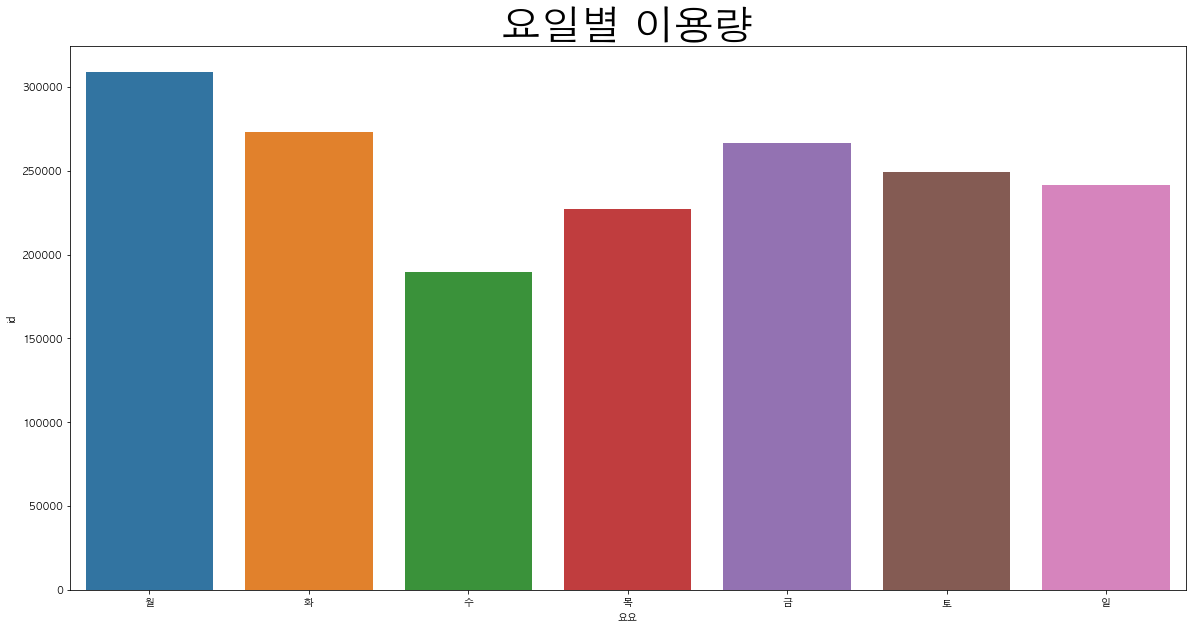

In [237]:
plt.figure(figsize=(20, 10))
sns.barplot(data=WG[0], x=WG[0]['요요'], y="id")
plt.title('요일별 이용량', fontsize=40)
plt.show()

In [238]:
totla_files[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time,요일
0,SPB-33273,2020-06-01 00:03:05,1050,���̿� 3�� ���Ա�,0,2020-06-01 00:05:59,1078,���̻�Ÿ�,0,3,0.00,00,0
1,SPB-30703,2020-06-01 00:00:46,1132,���̿� 7���ⱸ,0,2020-06-01 00:06:53,1169,��â�� 1�� �ⱸ,0,6,0.00,00,0
2,SPB-31969,2020-06-01 00:02:43,1306,�Ѽ����Ա���2���ⱸ,0,2020-06-01 00:06:59,388,�������б� ��,0,4,0.00,00,0
3,SPB-19763,2020-06-01 00:00:16,956,���Ͻ��屳����,8,2020-06-01 00:08:25,939,����û ������,6,7,1340.00,00,0
4,SPB-32949,2020-06-01 00:04:20,709,����3�� ����ο��� ��,0,2020-06-01 00:08:53,712,�����ʱ��Ա� ��Ÿ�,0,5,0.00,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755041,SPB-14356,2020-06-30 23:55:00,1160,��õ�ⱳ�� 7���ⱸ��,2,2020-07-01 01:55:02,1160,��õ�ⱳ�� 7���ⱸ��,1,119,18060.00,23,1
1755042,SPB-14454,2020-06-30 18:55:01,1235,���Ʈ������310�� ��,3,2020-07-01 02:46:48,1221,������Ÿ� �����ڴ���,4,471,870.00,18,1
1755043,SPB-12680,2020-06-30 13:01:33,1346,����8���̰��� ��,1,2020-07-01 02:50:27,1347,�������̾Ⱦ���Ʈ817�� �� ��,1,15,7230.00,13,1
1755044,SPB-32402,2020-06-30 16:45:32,1956,���߹̸����Ұ��� ��,0,2020-07-01 08:04:52,1956,���߹̸����Ұ��� ��,0,919,39786.76,16,1


In [239]:
def season(df):
    spr = [3,4,5]
    summ = [6,7,8]
    fall = [9,10,11]
    wint = [12,1,2]
    S = []
    tmp = []
    date = df['대여일시'].str.split(' ')[0]
    for e in list(date):
        S.append(e[0])
    for i in S:
        if int(i[5:7]) in range(3,6):
            tmp.append(0)
        elif int(i[5:7]) in range(6,9):
            tmp.append(1)
        elif int(i[5:7]) in range(9,12):
            tmp.append(2)
        else:
            tmp.append(3)
    df['season'] = tmp
    return df

In [240]:
bike_season = totla_files

In [242]:
for tt in bike_season:
    season(tt)
bike_season[0]

,자전거번호,대여일시,id,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,time,요일,season
0,SPB-33273,2020-06-01 00:03:05,1050,���̿� 3�� ���Ա�,0,2020-06-01 00:05:59,1078,���̻�Ÿ�,0,3,0.00,00,0,1
1,SPB-30703,2020-06-01 00:00:46,1132,���̿� 7���ⱸ,0,2020-06-01 00:06:53,1169,��â�� 1�� �ⱸ,0,6,0.00,00,0,1
2,SPB-31969,2020-06-01 00:02:43,1306,�Ѽ����Ա���2���ⱸ,0,2020-06-01 00:06:59,388,�������б� ��,0,4,0.00,00,0,1
3,SPB-19763,2020-06-01 00:00:16,956,���Ͻ��屳����,8,2020-06-01 00:08:25,939,����û ������,6,7,1340.00,00,0,1
4,SPB-32949,2020-06-01 00:04:20,709,����3�� ����ο��� ��,0,2020-06-01 00:08:53,712,�����ʱ��Ա� ��Ÿ�,0,5,0.00,00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755041,SPB-14356,2020-06-30 23:55:00,1160,��õ�ⱳ�� 7���ⱸ��,2,2020-07-01 01:55:02,1160,��õ�ⱳ�� 7���ⱸ��,1,119,18060.00,23,1,1
1755042,SPB-14454,2020-06-30 18:55:01,1235,���Ʈ������310�� ��,3,2020-07-01 02:46:48,1221,������Ÿ� �����ڴ���,4,471,870.00,18,1,1
1755043,SPB-12680,2020-06-30 13:01:33,1346,����8���̰��� ��,1,2020-07-01 02:50:27,1347,�������̾Ⱦ���Ʈ817�� �� ��,1,15,7230.00,13,1,1
1755044,SPB-32402,2020-06-30 16:45:32,1956,���߹̸����Ұ��� ��,0,2020-07-01 08:04:52,1956,���߹̸����Ұ��� ��,0,919,39786.76,16,1,1


In [243]:
bike_season[0]['season'].unique()

array([1])

In [246]:
# 6,7,8,9,10,11,12,1,2,3,4, 5
# 0,1,2,3,4,5,6,7,8,9, 10,11
# 1,2,3,4,5,6,7,8,9,10,11,12
    spr = [3,4,5]
    summ = [6,7,8]
    fall = [9,10,11]
    wint = [12,1,2]
totla_files[0:3]

[             자전거번호                 대여일시    id               대여 대여소명  대여거치대  \
 0        SPB-33273  2020-06-01 00:03:05  1050       ���̿� 3�� ���Ա�      0   
 1        SPB-30703  2020-06-01 00:00:46  1132           ���̿� 7���ⱸ      0   
 2        SPB-31969  2020-06-01 00:02:43  1306       �Ѽ����Ա���2���ⱸ      0   
 3        SPB-19763  2020-06-01 00:00:16   956           ���Ͻ��屳����      8   
 4        SPB-32949  2020-06-01 00:04:20   709   ����3�� ����ο��� ��      0   
 ...            ...                  ...   ...                   ...    ...   
 1755041  SPB-14356  2020-06-30 23:55:00  1160       ��õ�ⱳ�� 7���ⱸ��      2   
 1755042  SPB-14454  2020-06-30 18:55:01  1235    ���Ʈ������310�� ��      3   
 1755043  SPB-12680  2020-06-30 13:01:33  1346      ����8���̰��� ��      1   
 1755044  SPB-32402  2020-06-30 16:45:32  1956      ���߹̸����Ұ��� ��      0   
 1755045  SPB-21598  2020-06-30 23:52:23  1008  �ϻ翪 3���ⱸ(���������)      4   
 
                         반납일시  반납대여소번호            

In [249]:
type(totla_files[0])

pandas.core.frame.DataFrame

In [252]:
spring['season'].unique()

array([3, 0])

In [261]:
spring = pd.concat([totla_files[2],totla_files[3],totla_files[4]])
summer = pd.concat([totla_files[5],totla_files[6],totla_files[7]])
fall  = pd.concat([totla_files[8],totla_files[9],totla_files[10]])
winter = pd.concat([totla_files[11],totla_files[0],totla_files[1]])

In [265]:
X = [len(spring),len(summer),len(fall),len(winter)]
len(spring)

5758700

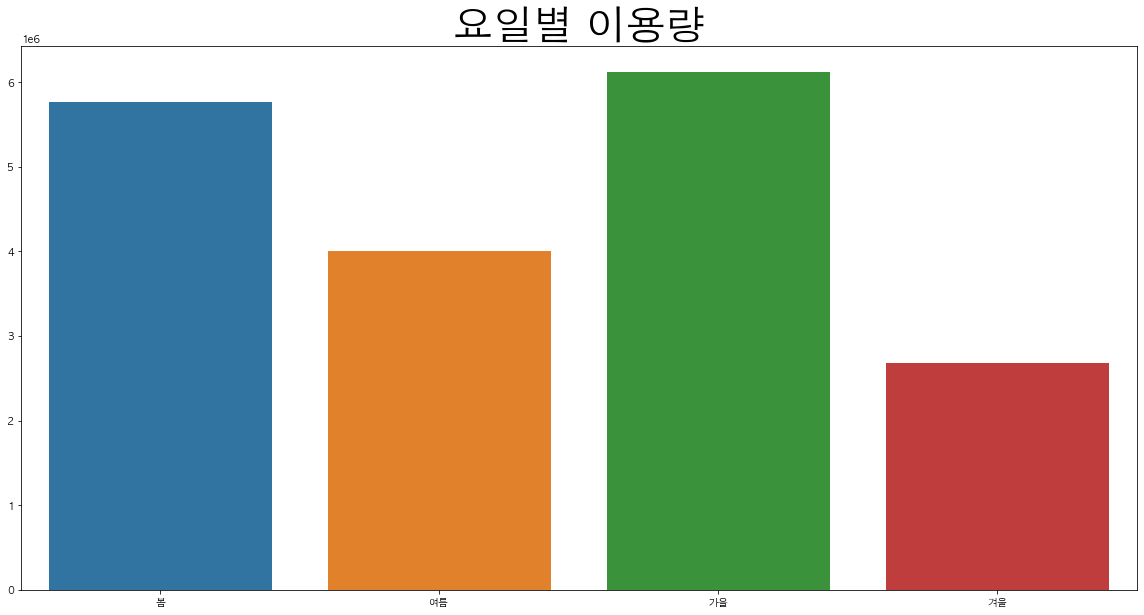

In [264]:
plt.figure(figsize=(20, 10))
sns.barplot(x=['봄','여름','가을','겨울'], y=X)
plt.title('요일별 이용량', fontsize=40)
plt.show()

In [270]:
month = []
for i in totla_files:
    month.append(len(i))

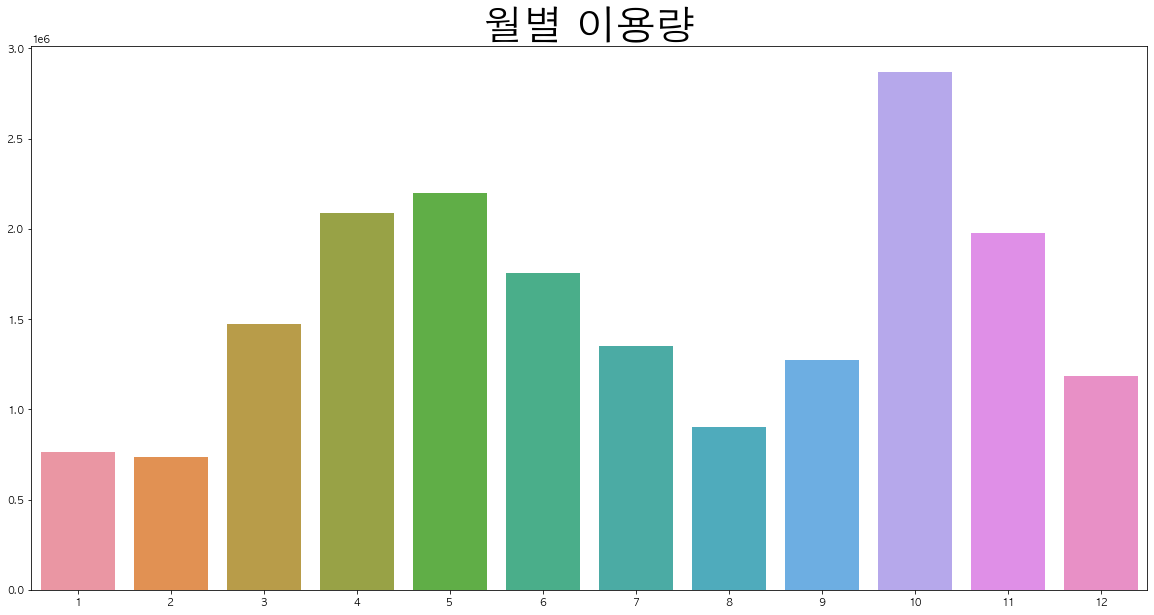

In [271]:
plt.figure(figsize=(20, 10))
sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12], y=month)
plt.title('월별 이용량', fontsize=40)
plt.show()